<a href="https://colab.research.google.com/github/Sunn2x333/scalar_framework/blob/main/BBNplusv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

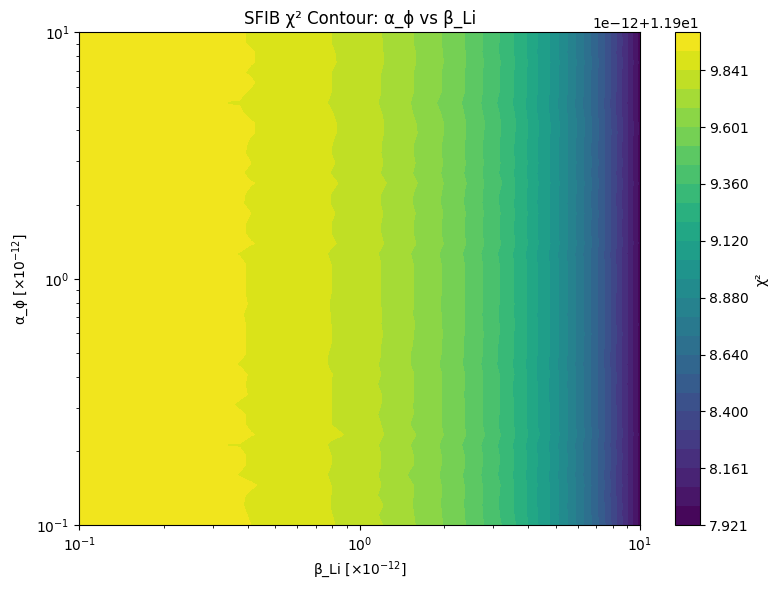

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed parameters
alpha_phi_vals = np.logspace(-13, -11, 50)
beta_Li_vals   = np.logspace(-13, -11, 50)

# Constants
L_dom = 3.94e-8
r_nuc = 5.0e-15
nabla_phi = 1.0 / (2*r_nuc)
T_BBN_keV = 100
obs = {'Yp':0.245, 'Li':1.6e-10, 'D':2.53e-5}
sig = {'Yp':0.004, 'Li':1e-10, 'D':0.1e-5}
Yp_std = 0.247
Li_std = 5.00e-10
D_std  = 2.50e-05
beta_D = 0.1e-12
H_factor = 1.0  # simplified for sweep

chi2_grid = np.zeros((len(alpha_phi_vals), len(beta_Li_vals)))

# Loop
for i, alpha in enumerate(alpha_phi_vals):
    k_Phi = alpha * (4*5.29177e-11)
    lensing_exponent = k_Phi * (nabla_phi**2) * L_dom
    lensing_boost = np.exp(np.clip(lensing_exponent, -700, 700))
    decay_suppress = 1.0 / lensing_boost

    for j, beta_Li in enumerate(beta_Li_vals):
        Li_suppress = np.exp(-beta_Li * nabla_phi * r_nuc / T_BBN_keV)
        Li_suppress = np.clip(Li_suppress, 1e-10, 1e10)**1.2

        # SFIB-modulated abundances
        Yp_obs = Yp_std * decay_suppress * lensing_boost
        Li_obs = Li_std * Li_suppress * decay_suppress * lensing_boost
        D_obs  = D_std * (1.0 / H_factor)**0.5 * decay_suppress * lensing_boost

        # χ²
        chi2 = sum(((v-obs[k])/sig[k])**2 for k,v in zip(['Yp','Li','D'], [Yp_obs, Li_obs, D_obs]))
        chi2_grid[i,j] = chi2

# ----------------------
# Plot χ² contour
# ----------------------
plt.figure(figsize=(8,6))
X, Y = np.meshgrid(beta_Li_vals, alpha_phi_vals)
plt.contourf(X*1e12, Y*1e12, chi2_grid, levels=30, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label(r'χ²')

plt.xlabel(r'β_Li [$\times 10^{-12}$]')
plt.ylabel(r'α_ϕ [$\times 10^{-12}$]')
plt.title('SFIB χ² Contour: α_ϕ vs β_Li')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.show()
